In [1]:

import numpy as np
import seaborn as sns
import patsy
import matplotlib.pyplot as plt
import pandas as pd
import re
import sys
from datetime import datetime
from datetime import date
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from patsy import dmatrices, dmatrix, demo_data
import statsmodels.api as sm
import math
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, precision_recall_curve, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from imblearn.over_sampling import RandomOverSampler

In [2]:
df=pd.read_csv("latest_cstm_data.csv")

In [23]:
df.tail(5)

,Unnamed: 0,CustomerID,Country,TotalAmount,ThresholdPrice,NumPurchases,PurchaseFrequency,Recency,HighProfile,ThresholdNumPc,ThresholdNumFy,CountryCode
4375,4375,17443.0,Canada,534.24,146.515161,1.0,0.0,219.0,False,1.5,3.0,5
4376,4376,17444.0,Canada,2940.04,146.515161,3.0,12.0,147.0,True,1.5,3.0,5
4377,4377,17844.0,Canada,51.56,146.515161,1.0,0.0,106.0,False,1.5,3.0,5
4378,4378,15480.0,Malta,905.50,110.325012,1.0,0.0,116.0,False,5.0,11.0,22
4379,4379,17828.0,Malta,1599.97,110.325012,9.0,22.0,8.0,True,5.0,11.0,22


In [3]:
df.head(8)

,Unnamed: 0,CustomerID,Country,TotalAmount,ThresholdPrice,NumPurchases,PurchaseFrequency,Recency,HighProfile,ThresholdNumPc,ThresholdNumFy,CountryCode
0,0,12346.0,United Kingdom,0.00,929.228066,2.0,0.0,325.0,False,5.027089,42.761013,35
1,1,12747.0,United Kingdom,4196.01,929.228066,11.0,36.0,2.0,False,5.027089,42.761013,35
2,2,12748.0,United Kingdom,28405.56,929.228066,224.0,1.0,0.0,False,5.027089,42.761013,35
3,3,12749.0,United Kingdom,3868.20,929.228066,8.0,30.0,3.0,False,5.027089,42.761013,35
4,4,12820.0,United Kingdom,942.34,929.228066,4.0,107.0,3.0,False,5.027089,42.761013,35
5,5,12821.0,United Kingdom,92.72,929.228066,1.0,0.0,214.0,False,5.027089,42.761013,35
6,6,12822.0,United Kingdom,918.98,929.228066,3.0,8.0,70.0,False,5.027089,42.761013,35
7,7,12823.0,United Kingdom,1759.50,929.228066,5.0,55.0,74.0,False,5.027089,42.761013,35


In [22]:
df.columns

Index(['Unnamed: 0', 'CustomerID', 'Country', 'TotalAmount', 'ThresholdPrice',
       'NumPurchases', 'PurchaseFrequency', 'Recency', 'HighProfile',
       'ThresholdNumPc', 'ThresholdNumFy', 'CountryCode'],
      dtype='object')

In [4]:
df.columns=df.columns.str.strip()

In [5]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

In [6]:
X = df[["CountryCode","TotalAmount","NumPurchases","PurchaseFrequency","Recency"]]

y = df["HighProfile"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18, stratify=y)



In [7]:
X_train_scaled = std_scale.fit_transform(X_train)

X_test_scaled = std_scale.transform(X_test)

lm2 = LogisticRegression(solver='liblinear')
lm2.fit(X_train_scaled, y_train)

print("Training Accuracy:", round(lm2.score(X_train_scaled, y_train),3))
print("Testing Accuracy:", round(lm2.score(X_test_scaled, y_test),3))

Training Accuracy: 0.941
Testing Accuracy: 0.941


<AxesSubplot: title={'center': 'Logistic Regression Confusion Matrix'}>

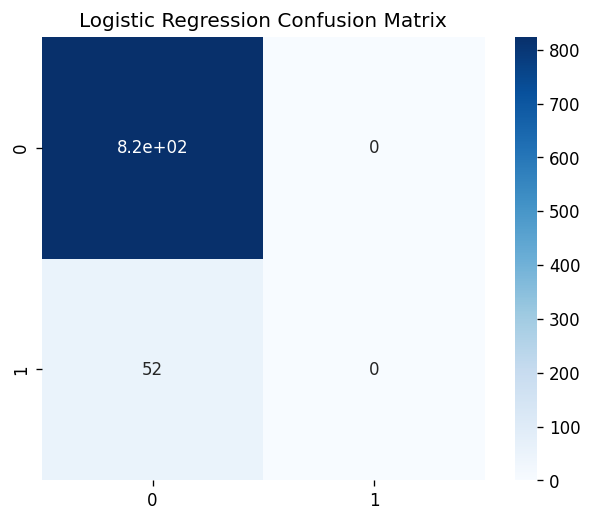

In [8]:
logit_confusion = confusion_matrix(y_test, lm2.predict(X_test_scaled))

plt.figure(dpi=120)
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True)

In [9]:
from sklearn.linear_model import SGDClassifier

In [10]:
X_train_scaled = std_scale.fit_transform(X_train)

X_test_scaled = std_scale.transform(X_test)

sgdc = SGDClassifier(max_iter=1000, tol=1e-3)
sgdc.fit(X_train_scaled, y_train)

print("Training Accuracy:", round(sgdc.score(X_train_scaled, y_train),3))
print("Testing Accuracy:", round(sgdc.score(X_test_scaled, y_test),3))

Training Accuracy: 0.938
Testing Accuracy: 0.938


<AxesSubplot: title={'center': 'Logistic Regression Confusion Matrix'}>

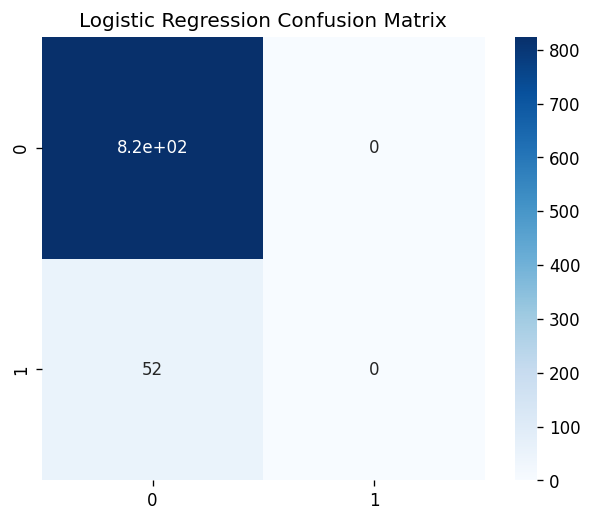

In [29]:
sgdc = confusion_matrix(y_test, sgdc.predict(X_test_scaled))

plt.figure(dpi=120)
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True)

In [11]:
from xgboost import XGBClassifier

In [12]:
xgb = XGBClassifier()
xgb.fit(X_train_scaled, y_train)

print("Training Accuracy:", round(xgb.score(X_train_scaled, y_train),3))
print("Testing Accuracy:", round(xgb.score(X_test_scaled, y_test),3))

Training Accuracy: 1.0
Testing Accuracy: 0.991


<AxesSubplot: title={'center': 'Logistic Regression Confusion Matrix'}>

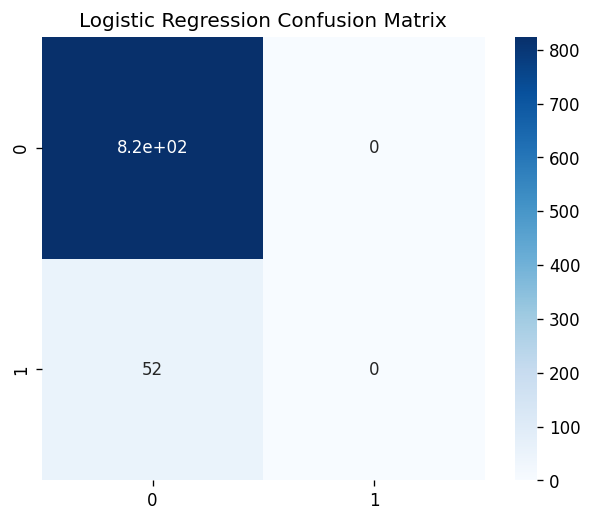

In [13]:
xgb_matrix = confusion_matrix(y_test, xgb.predict(X_test_scaled))

plt.figure(dpi=120)
plt.title('Logistic Regression Confusion Matrix')
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True)

In [15]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)

In [17]:
from collections import Counter
Counter(y_resampled)

Counter({False: 3296, True: 3296})

In [19]:
xgb.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

<AxesSubplot: title={'center': 'Xgb Balanced Confusion Matrix'}>

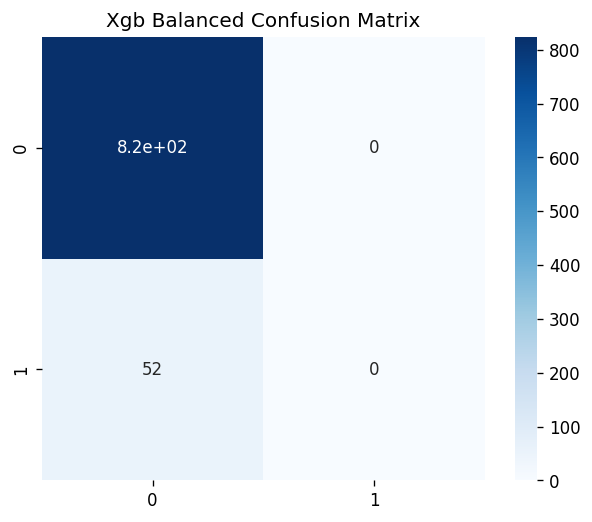

In [22]:
xgb_matrix = confusion_matrix(y_resampled, xgb.predict(X_resampled))

plt.figure(dpi=120)
plt.title('Xgb Balanced Confusion Matrix')
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True)